Starting all tests...
Testing PairsDataProcessor functions...

Testing load_stock_data:
Error loading stock1: Usecols do not match columns, columns expected but not found: ['ts']


AttributeError: 'NoneType' object has no attribute 'shape'

### Strat 


=== Single stock data sample ===
                         Close
ts                            
2021-10-14 09:01:00  53.700001
2021-10-14 09:02:00  53.700001
2021-10-14 09:03:00  53.700001
2021-10-14 09:04:00  53.700001
2021-10-14 09:05:00  53.599998

=== Resampled daily data ===
                Close
2024-09-12  51.000000
2024-09-13  50.900002
2024-09-16  51.299999
2024-09-18  51.400002
2024-09-19  51.299999

=== Testing full data combination ===
Found 332 CSV files
Loading progress: 3.0% (10/332 files)
Loading progress: 6.0% (20/332 files)
Loading progress: 9.0% (30/332 files)
Loading progress: 12.0% (40/332 files)
Loading progress: 15.1% (50/332 files)
Loading progress: 18.1% (60/332 files)
Loading progress: 21.1% (70/332 files)
Loading progress: 24.1% (80/332 files)
Loading progress: 27.1% (90/332 files)
Loading progress: 30.1% (100/332 files)
Loading progress: 33.1% (110/332 files)
Loading progress: 36.1% (120/332 files)
Loading progress: 39.2% (130/332 files)
Loading progress: 42

/Users/mouyasushi/Desktop/pair_trading/basic_coint.py:102: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


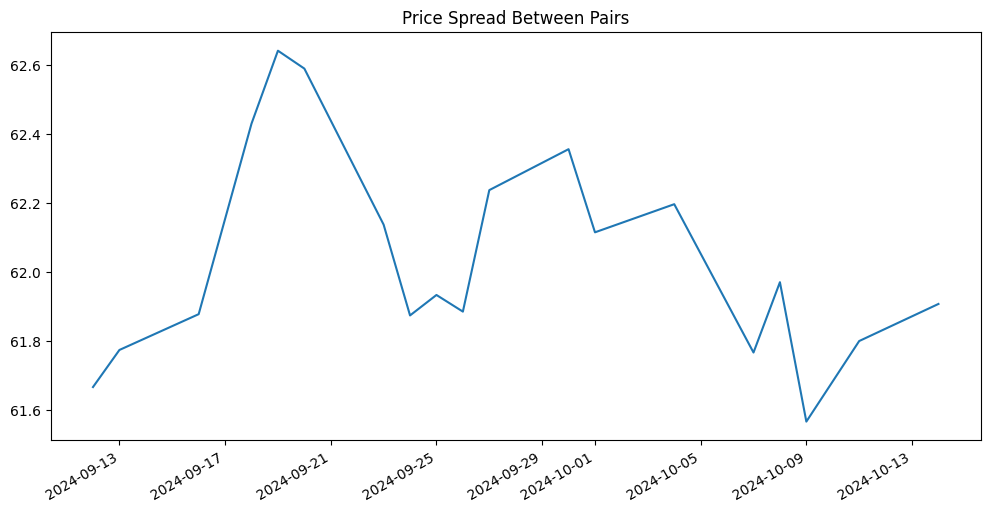

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basic_coint import PairsTradingStrategy

def test_trading_strategy(combined_data):
    print("\n=== Testing Trading Strategy ===")
    
    # Initialize the strategy
    strategy = PairsTradingStrategy()

    # Select two stocks for testing
    stock1 = combined_data.iloc[:, 0]
    stock2 = combined_data.iloc[:, 1]

    # Test data preparation
    stock1_clean, stock2_clean = strategy.prepare_pair_data(stock1, stock2)
    print("\nClean data samples:")
    print(pd.DataFrame({'Stock1': stock1_clean.head(), 'Stock2': stock2_clean.head()}))

    # Test hedge ratio calculation
    hedge_ratio = strategy.calculate_hedge_ratio(stock1_clean, stock2_clean)
    print(f"\nCalculated hedge ratio: {hedge_ratio}")

    # Calculate and visualize spread
    spread = stock1_clean - hedge_ratio * stock2_clean
    print("\nSpread statistics:")
    print(spread.describe())

    # Plot spread
    plt.figure(figsize=(12, 6))
    spread.plot()
    plt.title('Price Spread Between Pairs')
    plt.show()
    
    return stock1_clean, stock2_clean, hedge_ratio, spread

if __name__ == "__main__":
    combined_data = test_data_processor()
    test_trading_strategy(combined_data)

### Signals and return 


=== Single stock data sample ===
                         Close
ts                            
2021-10-14 09:01:00  53.700001
2021-10-14 09:02:00  53.700001
2021-10-14 09:03:00  53.700001
2021-10-14 09:04:00  53.700001
2021-10-14 09:05:00  53.599998

=== Resampled daily data ===
                Close
2024-09-12  51.000000
2024-09-13  50.900002
2024-09-16  51.299999
2024-09-18  51.400002
2024-09-19  51.299999

=== Testing full data combination ===
Found 332 CSV files
Loading progress: 3.0% (10/332 files)
Loading progress: 6.0% (20/332 files)
Loading progress: 9.0% (30/332 files)
Loading progress: 12.0% (40/332 files)
Loading progress: 15.1% (50/332 files)
Loading progress: 18.1% (60/332 files)
Loading progress: 21.1% (70/332 files)
Loading progress: 24.1% (80/332 files)
Loading progress: 27.1% (90/332 files)
Loading progress: 30.1% (100/332 files)
Loading progress: 33.1% (110/332 files)
Loading progress: 36.1% (120/332 files)
Loading progress: 39.2% (130/332 files)
Loading progress: 42

/Users/mouyasushi/Desktop/pair_trading/basic_coint.py:102: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


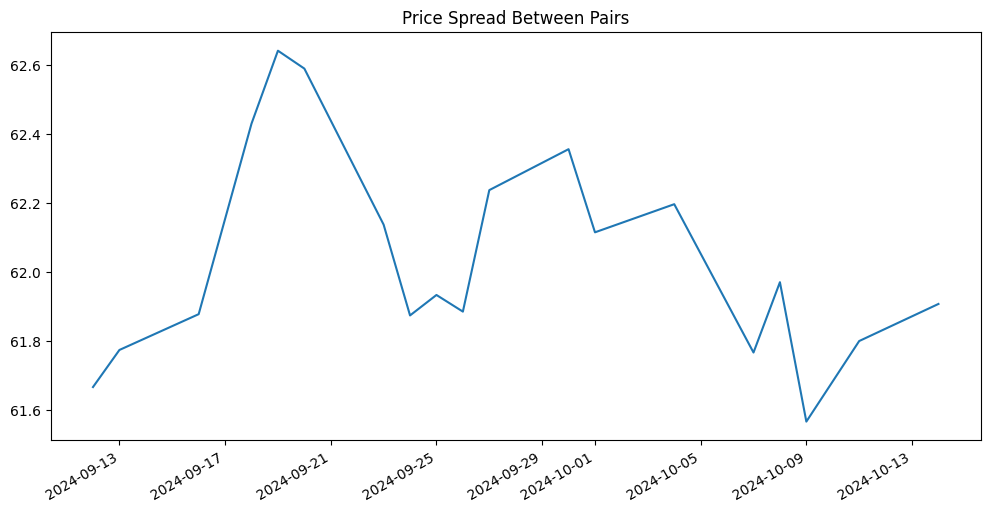


=== Testing Signals and Returns ===
Z-score statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


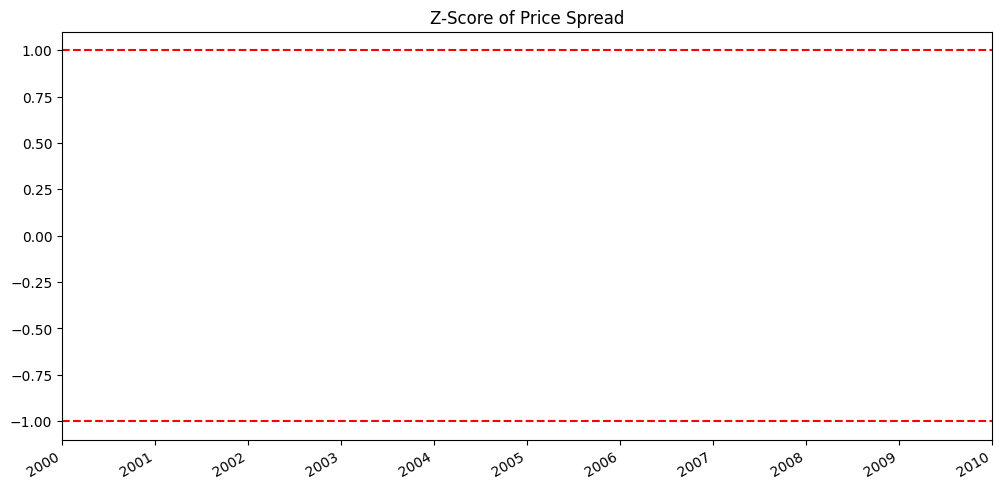


Signal statistics:
0    19
Name: count, dtype: int64


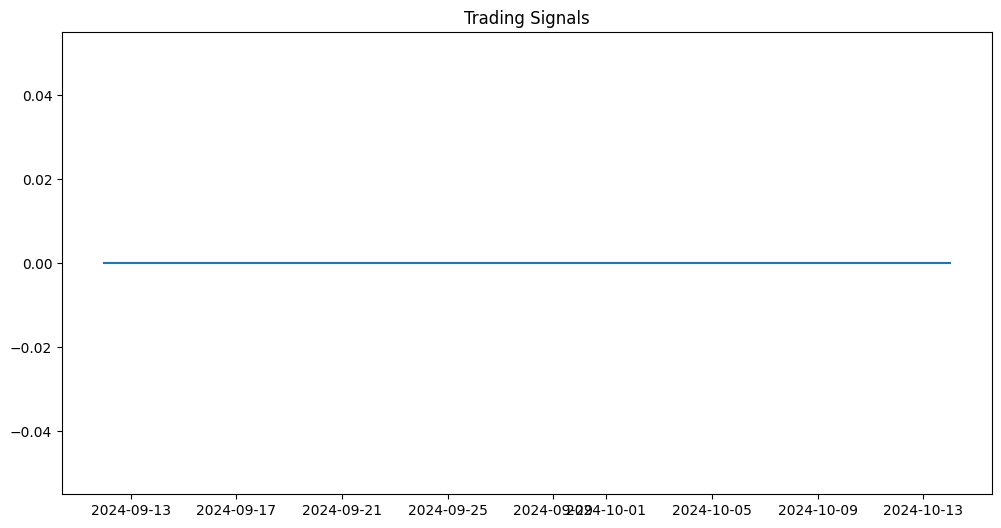


Returns statistics:
count    18.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


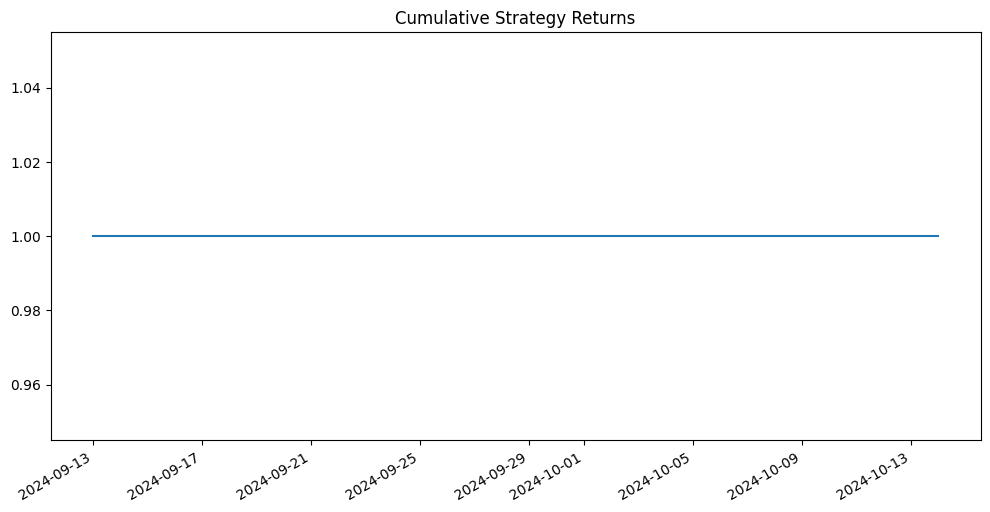

In [3]:
import matplotlib.pyplot as plt
from basic_coint import PairsTradingStrategy

def test_signals_and_returns(stock1_clean, stock2_clean, hedge_ratio, spread):
    print("\n=== Testing Signals and Returns ===")
    
    strategy = PairsTradingStrategy()

    # Test z-score calculation
    zscore = strategy.calculate_zscore(spread)
    print("Z-score statistics:")
    print(zscore.describe())

    # Plot z-score
    plt.figure(figsize=(12, 6))
    zscore.plot()
    plt.axhline(y=1.0, color='r', linestyle='--')
    plt.axhline(y=-1.0, color='r', linestyle='--')
    plt.title('Z-Score of Price Spread')
    plt.show()

    # Test signal generation
    signals = strategy.generate_signals(zscore)
    print("\nSignal statistics:")
    print(pd.Series(signals).value_counts())

    # Plot signals
    plt.figure(figsize=(12, 6))
    plt.plot(signals.index, signals)
    plt.title('Trading Signals')
    plt.show()

    # Test returns calculation
    pair_data = pd.concat([stock1_clean, stock2_clean], axis=1)
    returns = strategy.calculate_returns(pair_data, signals, hedge_ratio)
    print("\nReturns statistics:")
    print(returns.describe())

    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    (1 + returns).cumprod().plot()
    plt.title('Cumulative Strategy Returns')
    plt.show()
    
    return returns, signals, zscore

if __name__ == "__main__":
    combined_data = test_data_processor()
    stock1_clean, stock2_clean, hedge_ratio, spread = test_trading_strategy(combined_data)
    test_signals_and_returns(stock1_clean, stock2_clean, hedge_ratio, spread)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from basic_coint import PairsTradingStrategy
import seaborn as sns
from typing import Tuple, Dict

def test_position_exposures(strategy: PairsTradingStrategy,
                          pair_data: pd.DataFrame,
                          signals: pd.Series,
                          hedge_ratio: float) -> None:
    """Test the position exposures calculation"""
    print("\n=== Testing Position Exposures ===")
    
    exposures = strategy.calculate_position_exposures(pair_data, signals, hedge_ratio)
    
    # Print exposure statistics
    print("\nExposure Statistics:")
    print(exposures.describe())
    
    # Plot exposures over time
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    exposures[['stock1_position', 'stock2_position']].plot()
    plt.title('Stock Positions Over Time')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    exposures[['stock1_exposure', 'stock2_exposure']].plot()
    plt.title('Stock Exposures Over Time')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    exposures[['net_exposure', 'gross_exposure']].plot()
    plt.title('Net and Gross Exposures')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate exposure metrics
    print("\nExposure Metrics:")
    print(f"Average Net Exposure: {exposures['net_exposure'].mean():.2f}")
    print(f"Average Gross Exposure: {exposures['gross_exposure'].mean():.2f}")
    print(f"Max Absolute Net Exposure: {abs(exposures['net_exposure']).max():.2f}")
    print(f"Max Gross Exposure: {exposures['gross_exposure'].max():.2f}")

In [ ]:
def test_metrics_calculation(strategy: PairsTradingStrategy,
                           returns: pd.Series) -> Dict:
    """Test the performance metrics calculation"""
    print("\n=== Testing Performance Metrics ===")
    
    metrics = strategy.calculate_metrics(returns)
    
    # Print all metrics
    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")
    
    # Create visualization of returns distribution
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    returns.hist(bins=50)
    plt.title('Returns Distribution')
    
    plt.subplot(2, 2, 2)
    cumulative_returns = (1 + returns).cumprod() - 1
    cumulative_returns.plot()
    plt.title('Cumulative Returns')
    
    plt.subplot(2, 2, 3)
    drawdowns = cumulative_returns - cumulative_returns.cummax()
    drawdowns.plot()
    plt.title('Drawdowns')
    
    plt.subplot(2, 2, 4)
    sns.boxplot(y=returns)
    plt.title('Returns Box Plot')
    
    plt.tight_layout()
    plt.show()
    
    return metrics

In [ ]:
def test_pair_validity(strategy: PairsTradingStrategy,
                      stock1_clean: pd.Series,
                      stock2_clean: pd.Series) -> None:
    """Test the pair validity checks"""
    print("\n=== Testing Pair Validity ===")
    
    # Test original pair
    is_valid = strategy.check_pair_validity(stock1_clean, stock2_clean)
    correlation = np.corrcoef(stock1_clean, stock2_clean)[0, 1]
    
    print(f"Original Pair Validity: {is_valid}")
    print(f"Correlation: {correlation:.4f}")
    
    # Test with modified data to verify validity checks
    # 1. Test with shorter series
    short_stock1 = stock1_clean[:strategy.min_samples-1]
    short_stock2 = stock2_clean[:strategy.min_samples-1]
    is_valid_short = strategy.check_pair_validity(short_stock1, short_stock2)
    print(f"\nValidity with shorter series (below min_samples): {is_valid_short}")
    
    # 2. Test with uncorrelated data
    uncorrelated_stock = pd.Series(np.random.randn(len(stock1_clean)), index=stock1_clean.index)
    is_valid_uncorrelated = strategy.check_pair_validity(stock1_clean, uncorrelated_stock)
    uncorrelated_correlation = np.corrcoef(stock1_clean, uncorrelated_stock)[0, 1]
    print(f"Validity with uncorrelated data: {is_valid_uncorrelated}")
    print(f"Uncorrelated correlation: {uncorrelated_correlation:.4f}")
    
    # Plot relationship between stocks
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(stock1_clean, stock2_clean, alpha=0.5)
    plt.title('Original Pair Relationship')
    plt.xlabel('Stock 1')
    plt.ylabel('Stock 2')
    
    plt.subplot(1, 2, 2)
    plt.scatter(stock1_clean, uncorrelated_stock, alpha=0.5)
    plt.title('Stock 1 vs Uncorrelated Stock')
    plt.xlabel('Stock 1')
    plt.ylabel('Uncorrelated Stock')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def run_all_tests(stock1_clean: pd.Series,
                  stock2_clean: pd.Series,
                  hedge_ratio: float,
                  spread: pd.Series) -> None:
    """Run all tests for the pairs trading strategy"""
    strategy = PairsTradingStrategy()
    
    # Previous test
    returns, signals, zscore = test_signals_and_returns(stock1_clean, stock2_clean, hedge_ratio, spread)
    
    # New tests
    pair_data = pd.concat([stock1_clean, stock2_clean], axis=1)
    test_position_exposures(strategy, pair_data, signals, hedge_ratio)
    metrics = test_metrics_calculation(strategy, returns)
    test_pair_validity(strategy, stock1_clean, stock2_clean)
    
    # Summary of all tests
    print("\n=== Complete Test Summary ===")
    print(f"Total number of signals generated: {len(signals[signals != 0])}")
    print(f"Sharpe ratio: {metrics['sharpe_ratio']:.4f}")
    print(f"Total return: {metrics['total_return']:.4%}")
    print(f"Win rate: {metrics['win_rate']:.4%}")

In [ ]:
# test_4_complete_execution.py
import pandas as pd
import matplotlib.pyplot as plt
from basic_coint import PairsTradingStrategy

def test_complete_execution(combined_data):
    print("\n=== Testing Complete Pair Trading Execution ===")
    
    strategy = PairsTradingStrategy()
    
    # Get first pair of stocks
    stock1_code = combined_data.columns[0]
    stock2_code = combined_data.columns[1]

    result = strategy.execute_pair_trade(
        combined_data[stock1_code],
        combined_data[stock2_code],
        (stock1_code, stock2_code)
    )

    if result:
        print(f"\nTrading results for pair {result.pair}:")
        print(f"Period: {result.start_date} to {result.end_date}")
        print("\nMetrics:")
        for metric, value in result.metrics.items():
            print(f"{metric}: {value:.4f}")
            
        # Plot positions and returns
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        result.positions['zscore'].plot(ax=ax1)
        ax1.axhline(y=1.0, color='r', linestyle='--')
        ax1.axhline(y=-1.0, color='r', linestyle='--')
        ax1.set_title('Z-Score and Trading Signals')
        
        (1 + result.returns).cumprod().plot(ax=ax2)
        ax2.set_title('Cumulative Returns')
        
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    combined_data = test_data_processor()
    test_complete_execution(combined_data)

In [ ]:
# Assuming you have your data ready
run_all_tests(stock1_clean, stock2_clean, hedge_ratio, spread)